# For CNN

In [1]:
try:
    import tensorflow as tf #.compat.v1 for tf v2
except:
    !pip install tensorflow==1.14.0
#tf.disable_v2_behavior()
import tensorflow as tf 
print(tf.__file__)
import os
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import numpy as np
try:
    import sklearn
except:
    !pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data

//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/__init__.py


## How to opperate tensorflow
example: ![](https://i.imgur.com/Mtyxskz.png)

In [2]:
# Multiply and display
a = tf.constant(2.0)
b = tf.constant(3.0)
c = a * b
sess = tf.Session()
#sess.run(c)

In [3]:
# Place holder: expected to receive a value later or during runtime
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add = a + b
sess = tf.Session()
output = sess.run(add, {a: [1,3], b: [2, 4]})
print('Adding a and b:', output)
print('Datatype:', output.dtype)

Adding a and b: [3. 7.]
Datatype: float32


Placeholder: ![](https://i.imgur.com/JdxEBlZ.png)

In [4]:
# Variable: modify the graph to produce new outputs
variable = tf.Variable([0.9,0.7], dtype = tf.float32)
#variable must be initialized before a graph is used for the first time.
init = tf.global_variables_initializer()
a=sess.run(init)
# Variables survive across multiple executions

## Logistic Regression

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
print(type(mnist))
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000


In [7]:
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print(" train_img 的 type : %s" % (type(train_img)))
print(" train_img 的 dimension : %s" % (train_img.shape,))
print(" train_label 的 type : %s" % (type(train_label)))
print(" train_label 的 dimension : %s" % (train_label.shape,))
print(" test_img 的 type : %s" % (type(test_img)))
print(" test_img 的 dimension : %s" % (test_img.shape,))
print(" test_label 的 type : %s" % (type(test_label)))
print(" test_label 的 dimension : %s" % (test_label.shape,))

 train_img 的 type : <class 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <class 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <class 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <class 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)


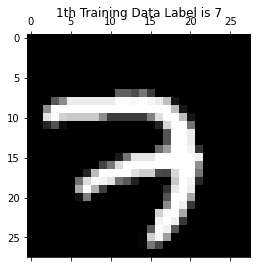

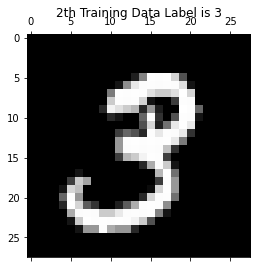

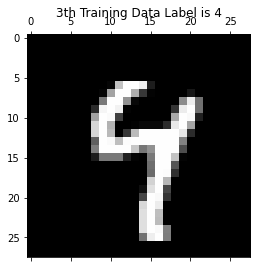

In [8]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in [0, 1, 2]:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " + "Label is " + str(curr_label))

In [9]:
x = tf.placeholder(tf.float32, [None, 784]) # for tf 1.x
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

$H(y) = - \Sigma y' log(\hat{y})$

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) #reduction_indices=[1]: sum along 2nd axis
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) # accuracy
print(sess.run(y[0,:], feed_dict = {x: mnist.test.images, y_: mnist.test.labels})) # 

0.9075
[3.4330419e-06 1.1640843e-09 1.2912553e-06 2.8971088e-05 1.8421377e-07
 1.6224586e-06 1.9611971e-08 9.9987590e-01 2.0525670e-06 8.6492684e-05]


## CNN
![](https://i.imgur.com/DTpSQv0.png)

In [13]:
# Reshape the images from 1*784 to 28 * 28
train_X = mnist.train.images.reshape(-1, 28, 28, 1)
test_X = mnist.test.images.reshape(-1,28,28,1)
print(train_X.shape, test_X.shape)

(55000, 28, 28, 1) (10000, 28, 28, 1)


In [14]:
# save features
train_y = mnist.train.labels
test_y = mnist.test.labels
print(train_y.shape, test_y.shape)

(55000, 10) (10000, 10)


In [15]:
# hyper parameters
training_iters = 10 # number of times you train
learning_rate = 0.001 # Intensity to update weightings, e.g. see below
batch_size = 128 # devide images and train, better to be a power of 2

#### learning rate
![](https://i.imgur.com/DPOpZv4.png)

In [16]:
# network parameter
n_input = 28 # image size: 28*28
n_classes = 10 # classes: (0-9)

In [17]:
# set input & feature, none -> get 128 when data feeded (batch size)
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder("float32")

In [18]:
# Add convolution layer & max pooling
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME') # stride: sliding step [along batch (1) , along ehight, along width, along channel (1)]
    x = tf.nn.bias_add(x, b) # add bias
    return tf.nn.relu(x) # add Relu: if x < 0: x == 0; elif x >= 0: x == x // elu(x) # if x < 0: x == e^x-1; elif x >= 0: x == x (for alphafold)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME') #max selected within every 2*2 region

In [19]:
# define weights and biases variables
weights = {
    # first convolution layer input: filter width, filter height, channel, num of filters
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    # second input: filter width, filter height, channel (from first layer = 32), num of output filter number
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    # third input
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    #  to a fully connected layer: 4*4*128 image to 2048*1 vector, number of neurons we want
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    # 32 filters: 32 bias
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    # 62 filters: 62 bias
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [20]:
# Build Keras framework
def conv_net(x, weights, biases, keep_prob):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    #with tf.variable_scope('V1'):
    conv1= conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2= conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    #outt = [out, conv1, conv1_ll, wei_1, conv1_max, conv2, conv2_ll, wei_2, conv2_max, conv3, conv3_ll, wei_3, conv3_max, fc1]
    return out

### Loss & Optimizer

In [21]:
pred= conv_net(x, weights, biases, keep_prob)
#record = pred
# cross-entropy loss function: input is predicted and true label
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
# Gradient descend
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# evaluation
#Here, you check whether the index of the maximum value of the predicted image is equal to the actual labeled image. And both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# initialize
init = tf.global_variables_initializer()

### Training
1. launching the graph in one session
2. run the session
3. define loop for training iterations
4. nest another loop for batches
5. input the images
6. feed the placeholders (input), output loss (cost) and accuracy


In [23]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y, keep_prob: 1.0})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.037519, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.97540
Iter 1, Loss= 0.032212, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.98470
Iter 2, Loss= 0.041180, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.98850
Iter 3, Loss= 0.036476, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99070
Iter 4, Loss= 0.045005, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99230
Iter 5, Loss= 0.035747, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99190
Iter 6, Loss= 0.034307, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99310
Iter 7, Loss= 0.028662, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99330
Iter 8, Loss= 0.027150, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99390
Iter 9, Loss= 0.035861, Training Accuracy= 0.99219
Optimization Finished!
Testing Accuracy: 0.99340


### Visualization

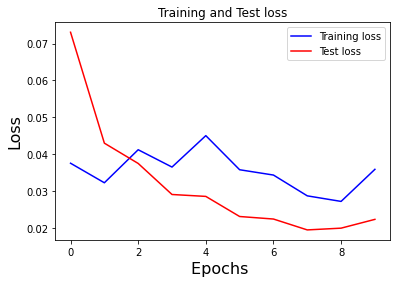

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

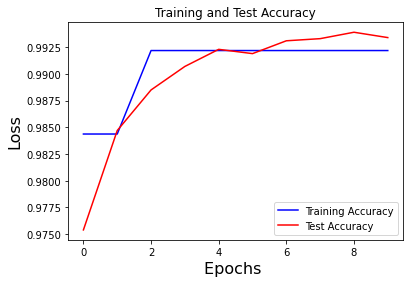

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

### weights and layers

In [26]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    w = weights
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = np.int(np.ceil(np.sqrt(num_filters)))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [27]:
def plot_conv_layer(layer):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.
    values = layer
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = np.int(np.ceil(np.sqrt(num_filters)))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[3, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

//anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


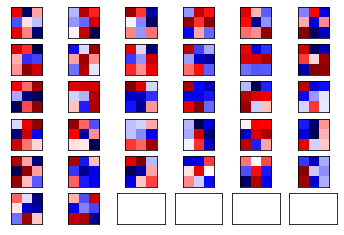

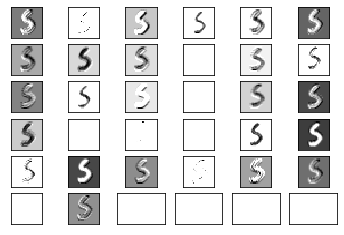

In [40]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
weight1 = np.array(weights['wc1'].eval())#[:,:,0,0:9]
plot_conv_weights(weight1, 0)
conv1= conv2d(train_X[0:50], weights['wc1'], biases['bc1'])
conv11 = conv1.eval()
plot_conv_layer(conv11)

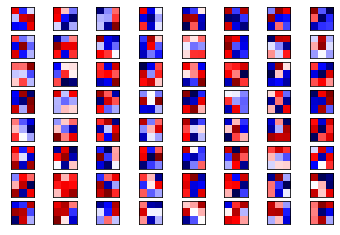

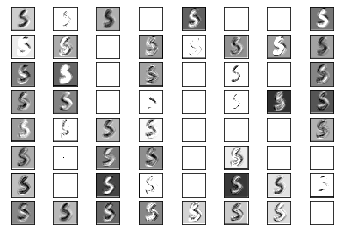

In [32]:
weight2 = np.array(weights['wc2'].eval())#[:,:,0,0:9]
plot_conv_weights(weight2, 15)
conv2= conv2d(conv1, weights['wc2'], biases['bc2'])
conv22 = conv2.eval()
plot_conv_layer(conv22)

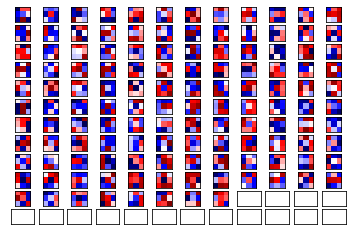

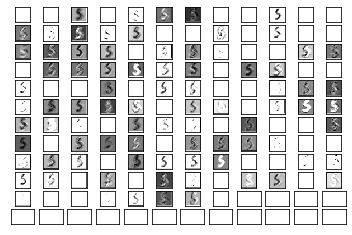

In [33]:
weight3 = np.array(weights['wc3'].eval())#[:,:,0,0:9]
plot_conv_weights(weight3, 32)
conv3= conv2d(conv2, weights['wc3'], biases['bc3'])
conv33 = conv3.eval()
plot_conv_layer(conv33)

In [39]:
def pca(X, n_components):
    pca = PCA(n_components = n_components)
    pca.fit(X)
    return pca.transform(X)

In [41]:
def tsne(X, n_components):
    model = TSNE(n_components=2, perplexity=40)
    return model.fit_transform(X)

In [53]:
def plot_scatter(x, labels, title, txt = False):
    plt.title(title)
    ax = plt.subplot()
    ax.scatter(x[:,0], x[:,1], c = labels)
    txts = []
    if txt:
        for i in range(10):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.show()

(1000, 14, 14, 32)


//anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


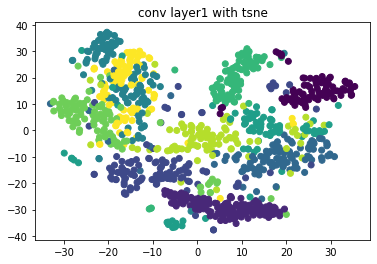

In [66]:
test_label_index = np.argmax(test_y[0:1000], axis = 1)
conv1_test= conv2d(test_X[0:1000], weights['wc1'], biases['bc1'])
conv1_test = maxpool2d(conv1_test)
print(np.shape(conv1_test.eval()))
layer1_reshape = tf.reshape(conv1_test[:, :, :, :], [-1, 14 * 14 * 32])
layer1_pca = pca(layer1_reshape.eval(), 1000)#feed_dict ={ x: test_X}), 50
layer1_tsne = tsne(layer1_pca, 2)
plot_scatter(layer1_tsne, test_label_index, "conv layer1 with tsne")

(1000, 7, 7, 64)


//anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


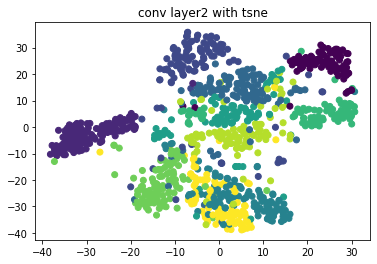

In [67]:
conv2_test= conv2d(conv1_test, weights['wc2'], biases['bc2'])
conv2_test = maxpool2d(conv2_test)
print(np.shape(conv2_test.eval()))
layer2_reshape = tf.reshape(conv2_test[:, :, :, :], [-1, 7 * 7 * 64])
layer2_pca = pca(layer2_reshape.eval(), 1000)#feed_dict ={ x: test_X}), 50
layer2_tsne = tsne(layer2_pca, 2)
plot_scatter(layer2_tsne, test_label_index, "conv layer2 with tsne")

(1000, 4, 4, 128)


//anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


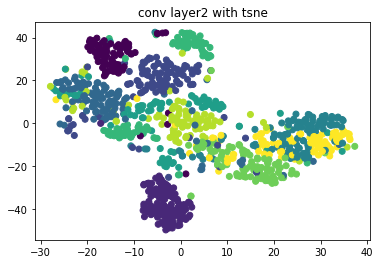

In [69]:
conv3_test= conv2d(conv2_test, weights['wc3'], biases['bc3'])
conv3_test = maxpool2d(conv3_test)
print(np.shape(conv3_test.eval()))
layer3_reshape = tf.reshape(conv3_test[:, :, :, :], [-1, 4 * 4 * 128])
layer3_pca = pca(layer3_reshape.eval(), 1000)#feed_dict ={ x: test_X}), 50
layer3_tsne = tsne(layer3_pca, 2)
plot_scatter(layer3_tsne, test_label_index, "conv layer3 with tsne")